# Importing Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [144]:
df = pd.read_csv('C:\\Users\\91630\\Desktop\\spam.csv')
# by using head we can see first five rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
# we can see the shape of the dataset
df.shape

(5572, 2)

In [146]:
# we can see the columns in the dataset
df.columns

Index(['Category', 'Message'], dtype='object')

In [147]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Preprocessing

In [149]:
# we can check the null values in the dataset
df.isna().sum()

Category    0
Message     0
dtype: int64

In [150]:
# we can check the duplicated values in the dataset
df.duplicated().sum()

415

In [151]:
df.drop_duplicates(inplace=True)

In [152]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


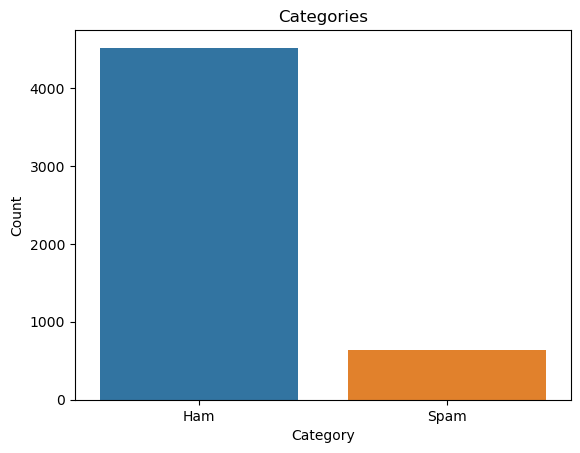

In [153]:
ax = sns.countplot(x = df['Category'])
ax.set_xticklabels(['Ham', 'Spam'])
plt.title('Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [154]:
df['Category'] = df['Category'].replace({'spam':0, 'ham':1})
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


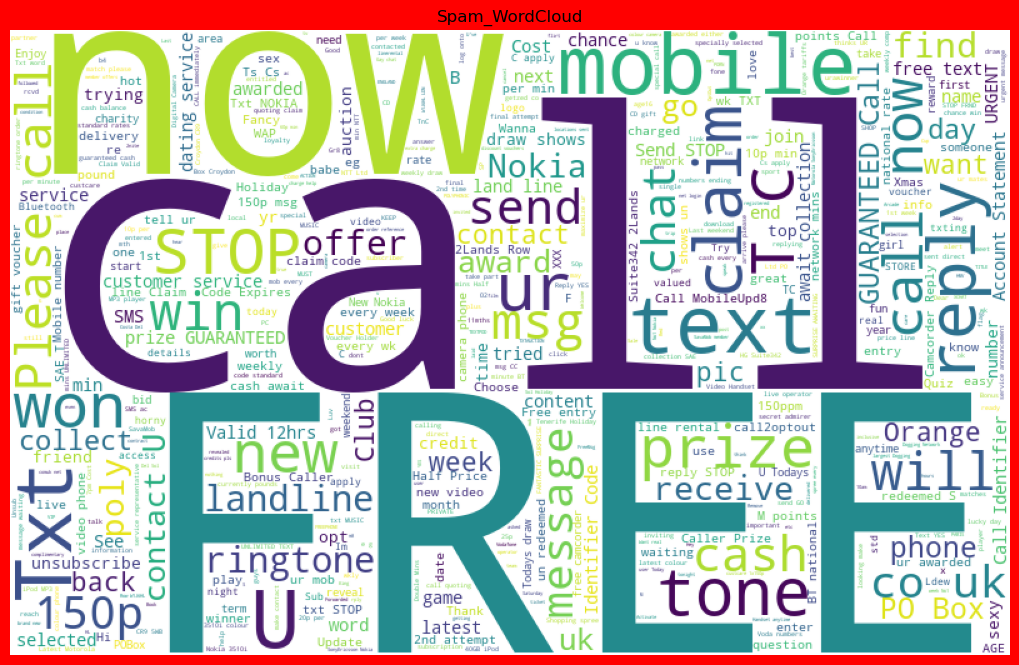

In [155]:
from wordcloud import WordCloud
spams = df['Message'][df['Category']==0]

spam_cloud = WordCloud(width=800,height=500, background_color='white',max_words=500).generate(''.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam_WordCloud')
plt.show()

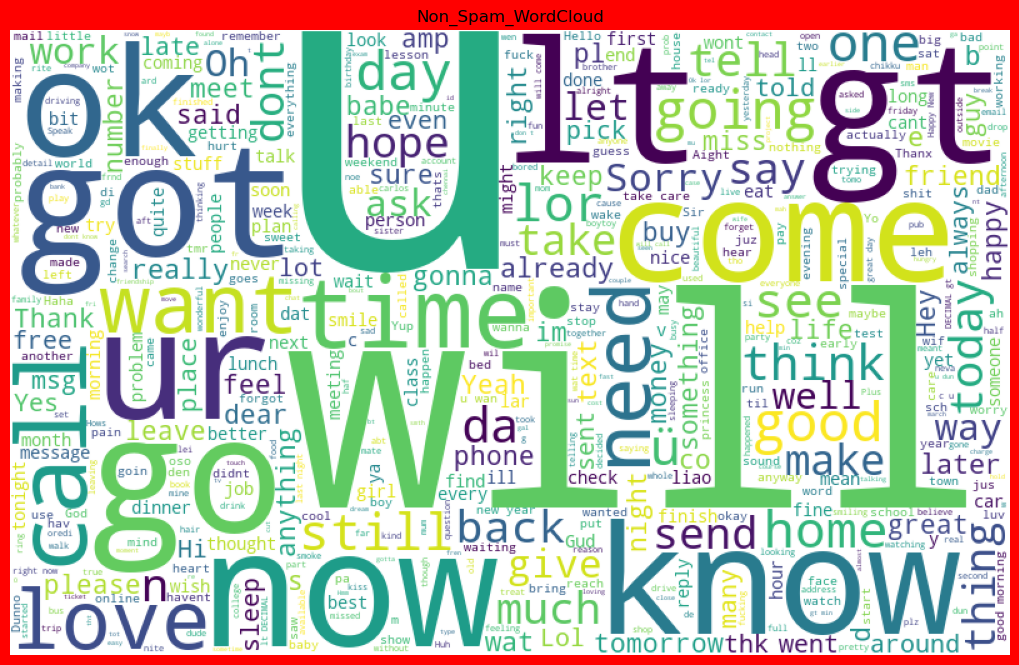

In [156]:
from wordcloud import WordCloud
spams = df['Message'][df['Category']==1]

non_spam_cloud = WordCloud(width=800,height=500, background_color='white',max_words=500).generate(''.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Non_Spam_WordCloud')
plt.show()

In [157]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
0            641    641  Free entry in 2 a wkly comp to win FA Cup fina...   
1           4516   4516  Go until jurong point, crazy.. Available only ...   

               
         freq  
Category       
0           1  
1           1

# Text data Preprocessing

In [158]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub('[^a-z\s]', '', text)# Remove special characters
    return text

# Apply the cleaning function to the Message column
df['Message'] = df['Message'].apply(clean_text)

# Display the first few cleaned messages
df.head()

,Category,Message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,0,free entry in a wkly comp to win fa cup final...
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...


In [159]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Assuming your dataset has a column named 'Message' containing the email text
emails = df['Message'].tolist()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Tokenize the emails, remove stopwords, apply stemming and lemmatization
stop_words = set(stopwords.words('english'))
processed_emails = []

for email in emails:
    # Tokenize the email text
    tokens = word_tokenize(email)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join the lemmatized tokens back into a string
    processed_email = ' '.join(lemmatized_tokens)
    processed_emails.append(processed_email)

# Update the 'text' column in your dataset with the processed emails
df['Message'] = processed_emails
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,1,go jurong point crazy available bugis n great ...
1,1,ok lar joking wif u oni
2,0,free entry wkly comp win fa cup final tkts st ...
3,1,u dun say early hor u c already say
4,1,nah dont think go usf life around though


# Exploratory Data Analysis

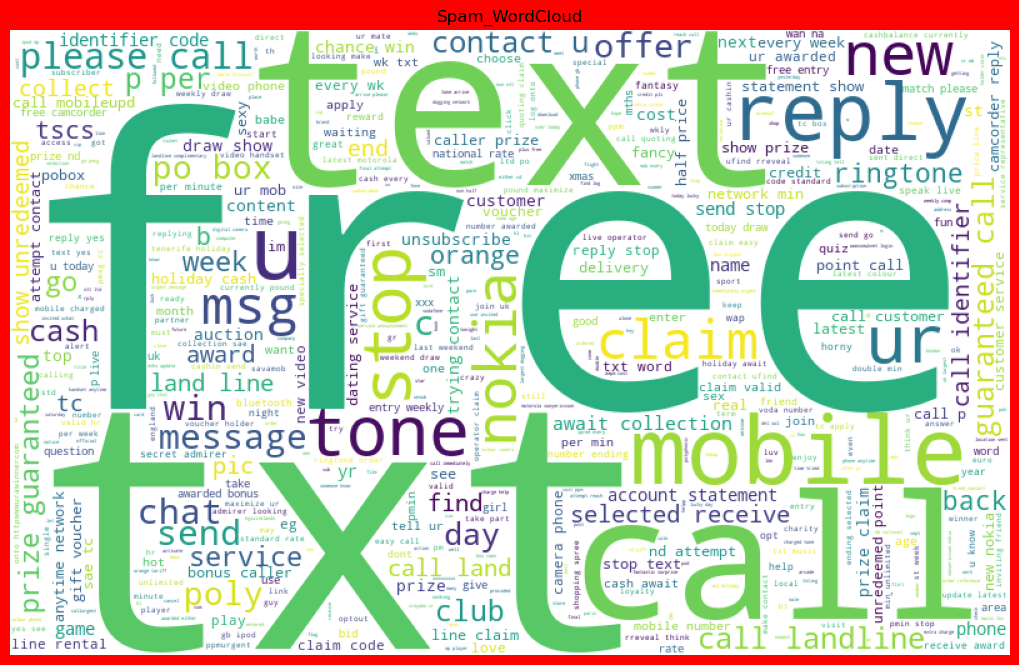

In [160]:
from wordcloud import WordCloud
spams = df['Message'][df['Category']==0]

spam_cloud = WordCloud(width=800,height=500, background_color='white',max_words=500).generate(''.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam_WordCloud')
plt.show()

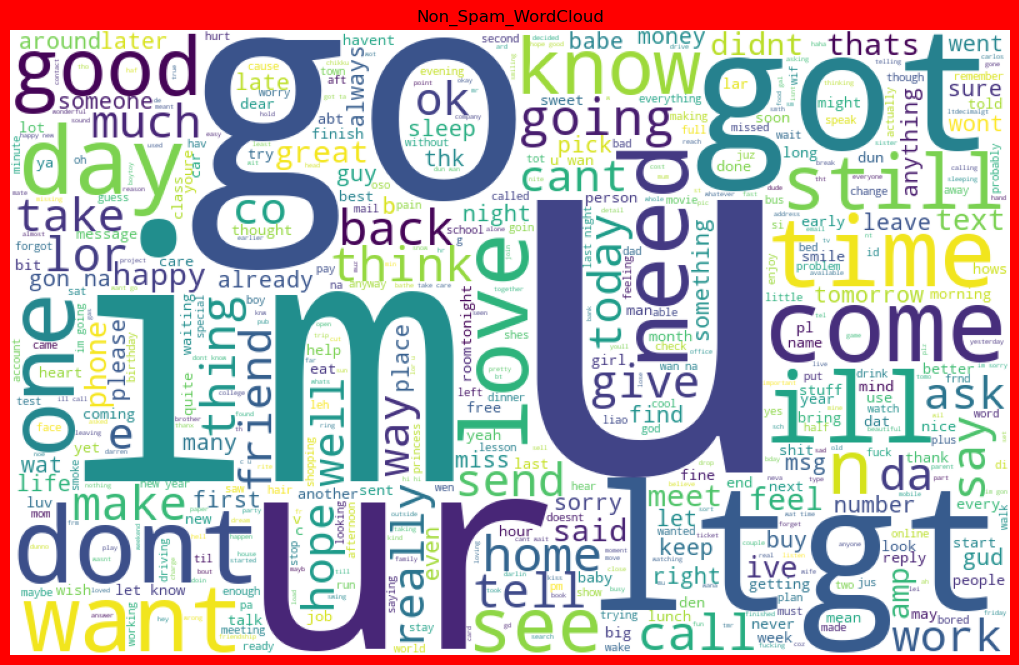

In [161]:
from wordcloud import WordCloud
spams = df['Message'][df['Category']==1]

non_spam_cloud = WordCloud(width=800,height=500, background_color='white',max_words=500).generate(''.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Non_Spam_WordCloud')
plt.show()

In [162]:
df['length'] = df['Message'].apply(len)
df.head()

,Category,Message,length
0,1,go jurong point crazy available bugis n great ...,82
1,1,ok lar joking wif u oni,23
2,0,free entry wkly comp win fa cup final tkts st ...,106
3,1,u dun say early hor u c already say,35
4,1,nah dont think go usf life around though,40


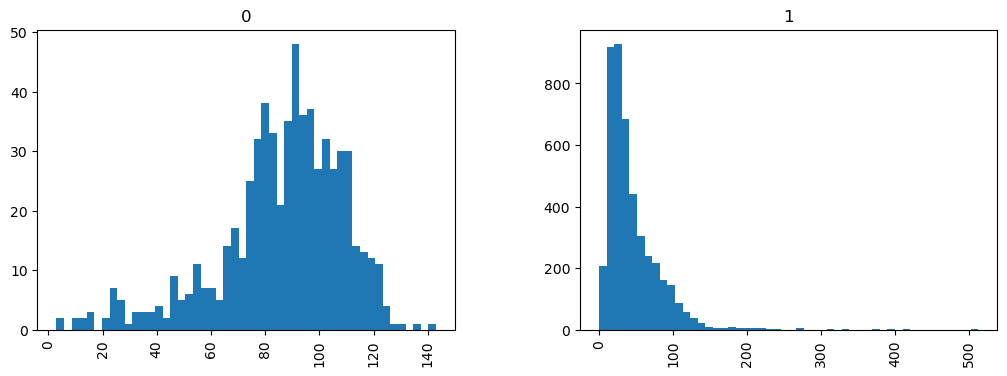

In [163]:
df.hist(column='length', by='Category', bins=50, figsize=(12,4))
plt.show()

In [164]:
df['Category'].value_counts(normalize = True)*100

Category
1    87.570293
0    12.429707
Name: proportion, dtype: float64

# Separating Data into feature and target variables

In [165]:
X = df.iloc[:,1]
y = df.iloc[:, 0]
X.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: Message, dtype: object

# Splitting Data into Training and Testing

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 10)

In [168]:
X_train.shape, X_test.shape

((4125,), (1032,))

# Converting Text Data into numerical

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
feature_extraction = TfidfVectorizer()
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [171]:
X_train_features.shape, X_test_features.shape, y_train.shape, y_test.shape

((4125, 6994), (1032, 6994), (4125,), (1032,))

# Balancing the Data using Smote library

In [172]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_features, y_train)

In [173]:
y_train.value_counts(normalize = True)*100

Category
0    50.0
1    50.0
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

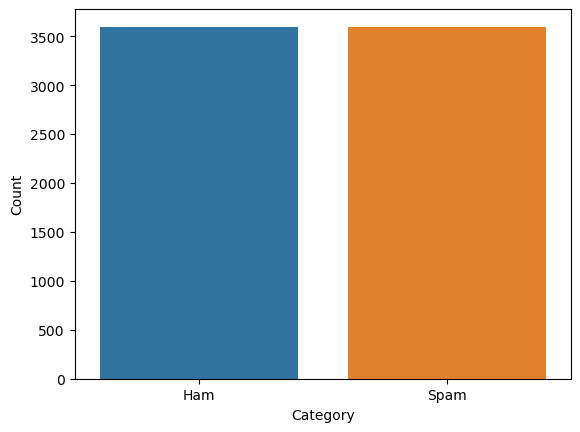

In [174]:
ax = sns.countplot(x = y_train)
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('Category')
plt.ylabel('Count')

# Multinomial Naive Bayes 

In [175]:
from sklearn.naive_bayes import MultinomialNB

In [176]:
model = MultinomialNB()

In [177]:
model.fit(X_train, y_train)

MultinomialNB()

In [178]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7194, 6994), (1032,), (7194,), (1032,))

In [179]:
X_pred = model.predict(X_train)
score = accuracy_score(y_train, X_pred)
score

0.9854045037531276

In [180]:
Y_pred = feature_extraction.transform(X_test)
predictions = model.predict(Y_pred)
score = accuracy_score(y_test, predictions)
score

0.9486434108527132

# After HyperParameter Tuning using GridSearchCV

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
param_grid = {'alpha' : [0.1, 0.5, 1.0, 1.5, 2.0]}

In [183]:
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs =-1)

In [184]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [185]:
grid.best_score_

0.9844317980826199

In [186]:
grid.best_params_

{'alpha': 0.1}

In [187]:
naive1 = MultinomialNB(alpha=0.1)
naive1.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [188]:
X_pred = naive1.predict(X_train)
score = accuracy_score(y_train, X_pred)
score

0.9923547400611621

In [189]:
Y_pred = feature_extraction.transform(X_test)
prediction = naive1.predict(Y_pred)
score = accuracy_score(y_test, prediction)
score

0.9593023255813954

# SVM

In [190]:
from sklearn.svm import SVC

In [191]:
model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [192]:
X_pred = model1.predict(X_train)
score = accuracy_score(y_train, X_pred)
score

1.0

In [193]:
Y_pred = feature_extraction.transform(X_test)
predictions = model1.predict(Y_pred)
score = accuracy_score(y_test, predictions)
score

0.9874031007751938

# Making Predictions

In [194]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       113
           1       0.99      0.97      0.98       919

    accuracy                           0.96      1032
   macro avg       0.88      0.94      0.90      1032
weighted avg       0.96      0.96      0.96      1032



In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
confusion_matrix(predictions, y_test)

array([[101,   1],
       [ 12, 918]], dtype=int64)

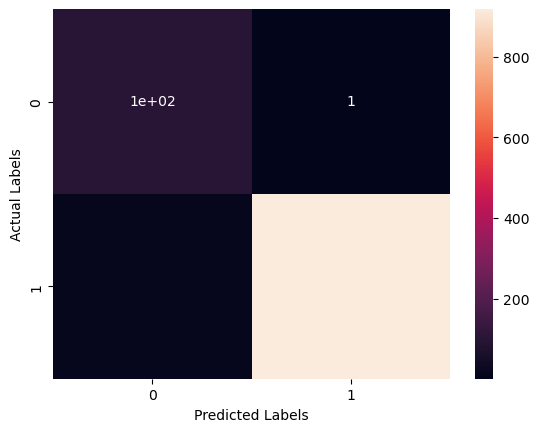

In [197]:
sns.heatmap(confusion_matrix(predictions, y_test), annot =True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [198]:
input_data = [
    "congrates you won a bike in lucky draw"
]
email_spam = feature_extraction.transform(input_data)
predictions = model.predict(email_spam)

In [199]:
if predictions == 1:
    print('The Mail is ham')
else:
    print('The Mail is Spam')

The Mail is Spam
